Credits/Course URL - https://www.udemy.com/course/the-ultimate-beginners-guide-to-natural-language-processing/

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import en_core_web_sm
import random
import re
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from langdetect import detect
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from slugify import slugify, Slugify
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


## Sentiment Analysis using Twitter Data

#### Reading the data and exploration

In [2]:
tweets = pd.read_csv(r'E:\Github\Datasets\tweets.csv', 
                     low_memory=False, 
                     encoding = 'latin1', 
                     header=None,
                     names=['sentiment', 'id', 'date', 'query', 'user', 'text'])

In [3]:
tweets.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
tweets['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [6]:
tweets_processed = tweets.copy(deep=True)

#### Splitting the dataset

In [7]:
tweets_processed = tweets_processed.drop(['id', 'date', 'query', 'user'], axis = 1)

In [8]:
tweets_processed.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [9]:
X_ = tweets_processed['text'].values
y_ = tweets_processed['sentiment'].values

In [10]:
X, X_, y, y_ = train_test_split(X_, y_, test_size=0.90, random_state=42)

In [11]:
X.shape, y.shape

((160000,), (160000,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
X_train.shape, y_train.shape

((120000,), (120000,))

In [16]:
X_test.shape, y_test.shape

((40000,), (40000,))

In [17]:
np.unique(y_train, return_counts=True)

(array([0, 4], dtype=int64), array([59903, 60097], dtype=int64))

In [18]:
np.unique(y_test, return_counts=True)

(array([0, 4], dtype=int64), array([20132, 19868], dtype=int64))

#### Detecting language

In [19]:
detect('lets see which language is this!')

'en'

In [20]:
def lang_detector(sentence_list):
    
    lang_detected_list = []
    
    for index, tweet in enumerate(sentence_list):
        try:
            if len(tweet) != 0:
                lang = detect(tweet)
                lang_detected_list.append(lang)
            else:
                lang_detected_list.append('EMPTY TWEET')
        except:
            print(f"Exception Encountered at position {index}: {tweet}")        
            lang_detected_list.append('UNKNOWN LANG : '+ str(tweet))
            pass
    return lang_detected_list

In [21]:
lang_X_train = lang_detector(X_train)

Exception Encountered at position 19075: Work@Amata 
Exception Encountered at position 38730: Sunday@Office .... 
Exception Encountered at position 91580:  lol@teedramoses


In [22]:
lang_X_test = lang_detector(X_test)

Checking how many unique languages got detected

In [23]:
np.unique(lang_X_train, return_counts=True)

(array(['UNKNOWN LANG :  lol@teedramoses',
        'UNKNOWN LANG : Sunday@Office .... ', 'UNKNOWN LANG : Work@Amata ',
        'af', 'ca', 'cs', 'cy', 'da', 'de', 'en', 'es', 'et', 'fi', 'fr',
        'hr', 'hu', 'id', 'it', 'lt', 'lv', 'nl', 'no', 'pl', 'pt', 'ro',
        'sk', 'sl', 'so', 'sq', 'sv', 'sw', 'tl', 'tr', 'uk', 'vi'],
       dtype='<U34'),
 array([     1,      1,      1,   1184,    255,     58,    742,    243,
           289, 111462,     85,    358,    193,    388,    103,     24,
           420,    278,     19,      6,    581,    479,    154,    101,
           116,     66,     66,   1016,     77,    233,    129,    681,
           106,      2,     83], dtype=int64))

In [24]:
np.unique(lang_X_test, return_counts=True)

(array(['af', 'ca', 'cs', 'cy', 'da', 'de', 'en', 'es', 'et', 'fi', 'fr',
        'hr', 'hu', 'id', 'it', 'lt', 'lv', 'nl', 'no', 'pl', 'pt', 'ro',
        'sk', 'sl', 'so', 'sq', 'sv', 'sw', 'tl', 'tr', 'uk', 'vi'],
       dtype='<U2'),
 array([  432,    87,    20,   235,    93,    94, 37183,    27,   101,
           51,   106,    36,    13,   145,    81,     6,     2,   214,
          136,    51,    28,    36,    17,    25,   367,    21,    91,
           36,   214,    15,     1,    36], dtype=int64))

In [131]:
X_train_df = pd.DataFrame({'X_train': X_train, 'y_train': y_train, 'lang_X_train': lang_X_train})
X_train_df.head()

,X_train,y_train,lang_X_train
0,@la_bellachica Its Ok lol i feel so much bigge...,4,en
1,@Daionii glasses are hot on girls,4,en
2,Don't have the time 2 bike 2day. What a lousy ...,0,en
3,"Wow, Â£155 for an administration charge. And ...",0,en
4,@TillyRossetti i just had some too- but unfor...,0,en


In [132]:
X_test_df = pd.DataFrame({'X_test': X_test, 'y_test': y_test, 'lang_X_test': lang_X_test})
X_test_df.head()

,X_test,y_test,lang_X_test
0,@mattpicasso iPhone is doing that &quot;not op...,0,en
1,@H4mTar0 Day of the Tentacle: briljant!,4,en
2,Who's that GIRL?? Livin' MY LIFE!!!!!!!!!!! I'...,0,en
3,tryna b a gud friend but i dunno if i can keep...,0,id
4,@Halliwellicious Ciao teso... Come stai?,4,it


In [133]:
X_train_df = X_train_df[X_train_df['lang_X_train'] == 'en']
X_test_df = X_test_df[X_test_df['lang_X_test'] == 'en']

In [39]:
X_train_df['X_train'][0]

'@la_bellachica Its Ok lol i feel so much bigger than what i am! ugh when you gonna cook for me '

In [44]:
slugify(X_test_df['X_test'][2], to_lower = True, separator = ' ')

'whos that girl livin my life im soooo sad why i love u but i want him'

In [46]:
custom_slugify = Slugify(to_lower = True, 
                         separator = ' ',
                         safe_chars = '@')

In [47]:
custom_slugify(X_test_df['X_test'][0])

'@mattpicasso iphone is doing that quot not opening downloaded apps quot thing and i forgot my cord at home'

In [48]:
custom_slugify('lets try this @love myself party @ 31 Dec 2022!!!!!!')

'lets try this @love myself party @ 31 dec 2022'

#### Cleaning the data

In [49]:
nlp = spacy.load('en_core_web_sm')
nlp

In [53]:
def preprocessing(sentence):
    
    sentence = re.sub(r"https?://[A-Za-z0-9/.-]+", ' ', sentence) # Remove URLs
    
    custom_slugify = Slugify(to_lower = True, 
                         separator = ' ',
                         safe_chars = '@')
    
    sentence = custom_slugify(sentence)
    #sentence = sentence.lower()
    sentence = re.sub(r"@[A-Za-z0-9]+", ' ', sentence)
    
    tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.like_num or token.is_punct or token.is_space or len(token) == 1)]
    
    tokens = ' '.join(tokens)
    return tokens

Testing preprocessing function

In [54]:
preprocessing("@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  2 You shoulda got David Carr of Third Day to do it. ;D")

'awww bummer shoulda got david carr day'

In [55]:
X_train_cleaned = [preprocessing(tweet) for tweet in X_train_df['X_train']]

Randomly displaying 10 tweets after cleaning

In [56]:
for cnt in range(10):
    print(X_train_cleaned[random.randint(0, len(X_train_cleaned)-1)])

hoping club shin stilts alas
let good times roll
try taking knives stabbing throat know feel right
okay nt net connection updated organized freely organizers
awww refreshing bath alternating hotncold water love feel water drops dancing eyelashes nosetip amp lipssss
resist need asleep screwed tomorrow
lost help find good home
oh hot layin soon
lmaoooo trice omg amp ur uncle
great looking blog like use


In [57]:
X_test_cleaned = [preprocessing(tweet) for tweet in X_test_df['X_test']]

In [58]:
for cnt in range(10):
    print(X_test_cleaned[random.randint(0, len(X_test_cleaned)-1)])

waving alice goodbye
yes night vanderpants essay wide awake ugh
hope ai nt long ya
miss nt
know feeling sweet dreams
chuckle drag hell pass creditor face damnation
looking response start conversation
hahaaaa doubt morning killed looooong time maybe weeks exercise mad
going shower right ill yim love
movie adorable pixar amp disney watch


In [134]:
X_train_cleaned = pd.Series(X_train_cleaned)
X_test_cleaned = pd.Series(X_test_cleaned)

In [127]:
X_train_df.shape[0], X_train_cleaned.shape[0]

(111462, 111462)

In [128]:
X_test_df.shape[0], X_test_cleaned.shape[0]

(37183, 37183)

In [136]:
X_train_df = pd.concat([X_train_df.reset_index(drop=True), X_train_cleaned], axis = 1)
X_train_df = X_train_df.rename(columns={0: 'X_train_cleaned'})

In [137]:
X_train_df.tail()

,X_train,y_train,lang_X_train,X_train_cleaned
111457,@Tinkerbell2009a Hi! I'm well thank you and yo...,4,en,hi thank hope having good sunday far
111458,Tired from everything today. Had loads of fun ...,4,en,tired today loads fun havta ready church
111459,blahh well the bus s really cold today and I d...,0,en,blahh bus cold today nt jacket haha people nee...
111460,Good morning everyone,4,en,good morning
111461,@Shatran,4,en,


In [139]:
X_test_df = pd.concat([X_test_df.reset_index(drop=True), X_test_cleaned], axis = 1)
X_test_df = X_test_df.rename(columns={0: 'X_test_cleaned'})

In [140]:
X_test_df.tail()

,X_test,y_test,lang_X_test,X_test_cleaned
37178,i'm sooo bored. listening to some K-pop goodn...,0,en,sooo bored listening pop goodness haha
37179,@ExocetAU you have a cane?,4,en,cane
37180,@englishteach8 thanks for the follow Friday -...,4,en,thanks follow friday saturday
37181,I hate Tuesdays....stupid update in progress.,0,en,hate tuesdays stupid update progress
37182,On the road home. We discovered a dedicab SN2 ...,0,en,road home discovered dedicab sn2 unlock code f...


In [141]:
X_train_df.shape[0] == X_train_df['lang_X_train'].value_counts()['en']

True

In [142]:
X_test_df.shape[0] == X_test_df['lang_X_test'].value_counts()['en']

True

In [ ]:
null_cleaned_tweets_percent_train = round((sum(X_train_df['X_train_cleaned'] == '')/X_train_df.shape[0])*100,2)
null_cleaned_tweets_percent_test = round((sum(X_test_df['X_test_cleaned'] == '')/X_test_df.shape[0])*100,2)

In [153]:
print(f'Data Percent having nothing after tweets are cleaned (of Training Data): {null_cleaned_tweets_percent_train}%')
print(f'Data Percent having nothing after tweets are cleaned (of Testing Data): {null_cleaned_tweets_percent_test}%')

Data Percent having nothing after tweets are cleaned (of Training Data): 0.45%
Data Percent having nothing after tweets are cleaned (of Testing Data): 0.41%


In [155]:
X_train_df = X_train_df[X_train_df['X_train_cleaned'] != '']
X_test_df = X_test_df[X_test_df['X_test_cleaned'] != '']

#### Wordcloud

In [157]:
' '.join(pd.Series(['abc', 'def', '123']))

'abc def 123'

In [158]:
X_train_cleaned_concatd = ' '.join(X_train_df['X_train_cleaned'])
X_test_cleaned_concatd = ' '.join(X_test_df['X_test_cleaned'])

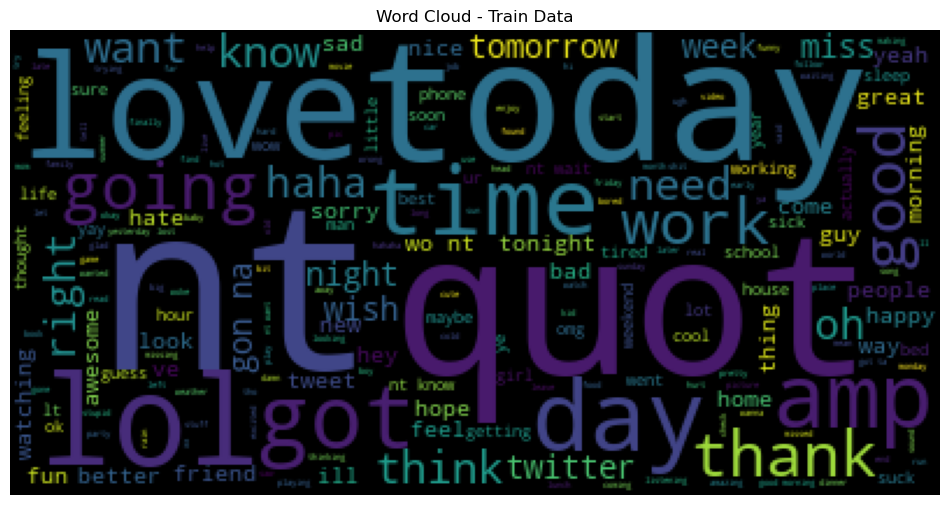

In [161]:
word_cloud = WordCloud()
word_cloud = word_cloud.generate(X_train_cleaned_concatd)

plt.figure(figsize=(12,12))
plt.imshow(word_cloud)
plt.axis('off')
plt.title("Word Cloud - Train Data");

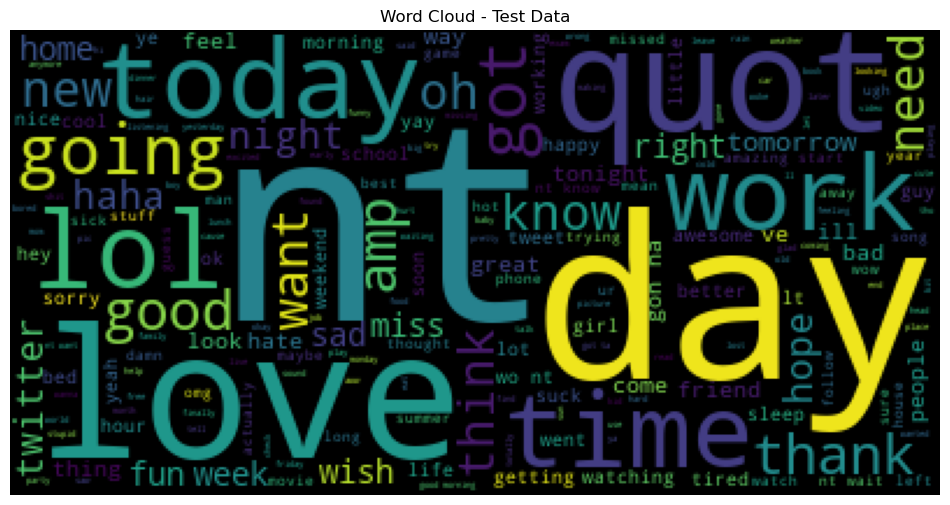

In [162]:
word_cloud = WordCloud()
word_cloud = word_cloud.generate(X_test_cleaned_concatd)

plt.figure(figsize=(12,12))
plt.imshow(word_cloud)
plt.axis('off')
plt.title("Word Cloud - Test Data");

#### Sentiment Analysis using NLTK's 'SentimentIntensityAnalyzer'

In [166]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Luvkush\AppData\Roaming\nltk_data...


True

In [167]:
nltk_sentiment_classifier = SentimentIntensityAnalyzer()

In [168]:
nltk_sentiment_classifier.polarity_scores('I love India')

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [171]:
for string in ['I hate origano', 'Pizzas are not so tasty', 'Burgers are love!!', 'I will got to market']:
    print(nltk_sentiment_classifier.polarity_scores(string))

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.6988}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [173]:
X_train_df.head(3)

,X_train,y_train,lang_X_train,X_train_cleaned
0,@la_bellachica Its Ok lol i feel so much bigge...,4,en,bellachica ok lol feel bigger ugh gon na cook
1,@Daionii glasses are hot on girls,4,en,glasses hot girls
2,Don't have the time 2 bike 2day. What a lousy ...,0,en,nt time bike 2day lousy day


In [174]:
X_train_modelling = X_train_df['X_train_cleaned'].values
y_train_modelling = X_train_df['y_train'].values

In [176]:
X_test_df.head(3)

,X_test,y_test,lang_X_test,X_test_cleaned
0,@mattpicasso iPhone is doing that &quot;not op...,0,en,iphone quot opening downloaded apps quot thing...
1,@H4mTar0 Day of the Tentacle: briljant!,4,en,day tentacle briljant
2,Who's that GIRL?? Livin' MY LIFE!!!!!!!!!!! I'...,0,en,girl livin life soooo sad love want


In [177]:
X_test_modelling = X_test_df['X_test_cleaned'].values
y_test_modelling = X_test_df['y_test'].values

In [180]:
def nltk_sentiment_predictor(data):
    
    predicted_sentiment = []
    
    for tweet in data:

        sentiments = nltk_sentiment_classifier.polarity_scores(tweet)

        if sentiments['neg'] >= 0.4:
            predicted_sentiment.append(0)
        else:
            predicted_sentiment.append(4) # neutral sentiment is also considered as positive
        
    return predicted_sentiment


In [182]:
y_pred_train_nltk = nltk_sentiment_predictor(X_train_modelling)

#### Result Analysis - NLTK's 'SentimentIntensityAnalyzer'

In [187]:
print(classification_report(y_train_modelling, np.array(y_pred_train_nltk)))

              precision    recall  f1-score   support

           0       0.83      0.21      0.33     55630
           4       0.55      0.96      0.69     55334

    accuracy                           0.58    110964
   macro avg       0.69      0.58      0.51    110964
weighted avg       0.69      0.58      0.51    110964



array([[11632, 43998],
       [ 2442, 52892]], dtype=int64)

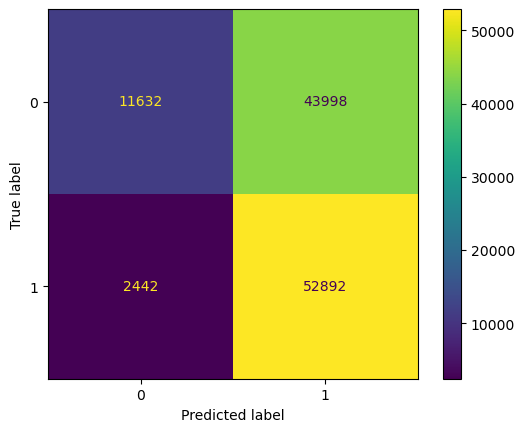

In [191]:
cm = confusion_matrix(y_train_modelling, np.array(y_pred_train_nltk))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show();

### Sentiment Analysis using TF-IDF

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(np.array(X_train_cleaned))

In [ ]:
X_train_tfidf.shape

In [ ]:
vectorizer.get_feature_names_out()

In [ ]:
def preprocess_lemma(sentence):
    nlp = spacy.load('en_core_web_sm')
    tokens = [tok.lemma_ for tok in nlp(sentence)]
    tokens = ' '.join(tokens)
    return tokens

In [ ]:
preprocess_lemma('learn learned learning askg en espo')

In [ ]:
X_train_cleaned_lemma = [preprocess_lemma(tweet) for tweet in X_train_cleaned]

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(np.array(X_train_cleaned_lemma))

In [ ]:
X_train_tfidf.shape

In [ ]:
X_test_cleaned_lemma = [preprocess_lemma(tweet) for tweet in X_test_cleaned]

In [ ]:
X_test_tfidf = vectorizer.transform(np.array(X_test_cleaned_lemma))

In [ ]:
X_test_tfidf.shape